1. Job Satisfaction in  USA and Europe and statistical test

In [111]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import colorlover as cl
from functools import reduce
from textwrap import wrap
pd.set_option('display.max_columns' ,150)
pd.set_option('display.max_rows' ,150)
import re
import warnings
warnings.filterwarnings("ignore")

#Read datasets from year 2018 until 2020

df_2018 = pd.read_csv("survey_results_public_2018.csv")
df_2019 = pd.read_csv("survey_results_public_2019.csv")
df_2020 = pd.read_csv("survey_results_public_2020.csv")


In [112]:
df_2018_jobsat = df_2018[['Country', 'JobSatisfaction']][(   df_2018['Country'] == 'United States') 
                                         | (df_2018['Country'] == 'Finland') 
                                         | (df_2018['Country'] == 'Denmark')
                                         | (df_2018['Country'] == 'Iceland')
                                         | (df_2018['Country'] == 'Switzerland') 
                                         | (df_2018['Country'] == 'Netherlands') 
                                         | (df_2018['Country'] == 'Luxembourg') 
                                         | (df_2018['Country'] == 'Sweden') 
                                         | (df_2018['Country'] == 'Norway') 
                                         | (df_2018['Country'] == 'Austria') 
                                         | (df_2018['Country'] == 'Ireland') 
                                         | (df_2018['Country'] == 'Germany') 
                                         | (df_2018['Country'] == 'United Kingdom') 
                                         | (df_2018['Country'] == 'Czech Republic') 
                                         | (df_2018['Country'] == 'Belgium') 
                                         | (df_2018['Country'] == 'France') 
                                         ]

#drop nulls 
df_2018_jobsat = df_2018_jobsat.dropna(axis = 0 , how="any").reset_index()
df_2018_jobsat.loc[~ (df_2018_jobsat['Country'] == 'United States') , 'Country']  = 'Europe'

df_2018_jobsat['Year'] = 2018

df_2018_jobsat['JobSatisfaction'].unique()

array(['Moderately dissatisfied', 'Moderately satisfied',
       'Neither satisfied nor dissatisfied', 'Slightly satisfied',
       'Extremely satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [113]:
#  Year 2018 ( different from 2019 and 2020), job satisfaction question has 7 alternatives and not 5. To keep consistency across all years 'Moderately dissatisfied' will be replaced with 
# Slightly dissatisfied /  Moderately satisfied with Slightly satisfied  /  'Extremely dissatisfied' with 'Very dissatisfied' / 'Extremely satisfied' with 'Very satisfied'

df_2018_jobsat.loc[ (df_2018_jobsat['JobSatisfaction'] == 'Moderately dissatisfied') , 'JobSatisfaction']  = 'Slightly dissatisfied'
df_2018_jobsat.loc[ (df_2018_jobsat['JobSatisfaction'] == 'Moderately satisfied') , 'JobSatisfaction']  = 'Slightly satisfied'
df_2018_jobsat.loc[ (df_2018_jobsat['JobSatisfaction'] == 'Extremely dissatisfied') , 'JobSatisfaction']  = 'Very dissatisfied'
df_2018_jobsat.loc[ (df_2018_jobsat['JobSatisfaction'] == 'Extremely satisfied') , 'JobSatisfaction']  = 'Very satisfied'

In [114]:
df_2018_jobsat.groupby(['Country','JobSatisfaction']).count()['index']

Country        JobSatisfaction                   
Europe         Neither satisfied nor dissatisfied     957
               Slightly dissatisfied                 3230
               Slightly satisfied                    9593
               Very dissatisfied                      531
               Very satisfied                        3687
United States  Neither satisfied nor dissatisfied     836
               Slightly dissatisfied                 2812
               Slightly satisfied                    7913
               Very dissatisfied                      526
               Very satisfied                        3762
Name: index, dtype: int64

In [115]:
df_2019_jobsat = df_2019[['Country', 'JobSat']][(   df_2019['Country'] == 'United States') 
                                         | (df_2019['Country'] == 'Finland') 
                                         | (df_2019['Country'] == 'Denmark')
                                         | (df_2019['Country'] == 'Iceland')
                                         | (df_2019['Country'] == 'Switzerland') 
                                         | (df_2019['Country'] == 'Netherlands') 
                                         | (df_2019['Country'] == 'Luxembourg') 
                                         | (df_2019['Country'] == 'Sweden') 
                                         | (df_2019['Country'] == 'Norway') 
                                         | (df_2019['Country'] == 'Austria') 
                                         | (df_2019['Country'] == 'Ireland') 
                                         | (df_2019['Country'] == 'Germany') 
                                         | (df_2019['Country'] == 'United Kingdom') 
                                         | (df_2019['Country'] == 'Czech Republic') ]

#drop nulls 
df_2019_jobsat = df_2019_jobsat.dropna(axis = 0 , how="any").reset_index()
df_2019_jobsat.loc[~ (df_2019_jobsat['Country'] == 'United States') , 'Country']  = 'Europe'

df_2019_jobsat['Year'] = 2019
                  
df_2019_jobsat.groupby(['Country','JobSat']).count()['index']

Country        JobSat                            
Europe         Neither satisfied nor dissatisfied    1698
               Slightly dissatisfied                 2220
               Slightly satisfied                    5674
               Very dissatisfied                      984
               Very satisfied                        5614
United States  Neither satisfied nor dissatisfied    1524
               Slightly dissatisfied                 2266
               Slightly satisfied                    5578
               Very dissatisfied                     1030
               Very satisfied                        7197
Name: index, dtype: int64

In [116]:
df_2020_jobsat = df_2020[['Country', 'JobSat']][(   df_2020['Country'] == 'United States') 
                                         | (df_2020['Country'] == 'Finland') 
                                         | (df_2020['Country'] == 'Denmark')
                                         | (df_2020['Country'] == 'Iceland')
                                         | (df_2020['Country'] == 'Switzerland') 
                                         | (df_2020['Country'] == 'Netherlands') 
                                         | (df_2020['Country'] == 'Luxembourg') 
                                         | (df_2020['Country'] == 'Sweden') 
                                         | (df_2020['Country'] == 'Norway') 
                                         | (df_2020['Country'] == 'Austria') 
                                         | (df_2020['Country'] == 'Ireland') 
                                         | (df_2020['Country'] == 'Germany') 
                                         | (df_2020['Country'] == 'United Kingdom') 
                                         | (df_2020['Country'] == 'Czech Republic') ]

#drop nulls 
df_2020_jobsat = df_2020_jobsat.dropna(axis = 0 , how="any").reset_index()
#group all Europian counties under 'Europe'
df_2020_jobsat.loc[~ (df_2020_jobsat['Country'] == 'United States') , 'Country']  = 'Europe'
df_2020_jobsat['Year'] = 2020




In [117]:
df_2020_2019 = df_2020_jobsat.append(df_2019_jobsat)
df_2020_2019 = df_2020_2019.rename(columns = {"JobSat" : "JobSatisfaction"})

df_all_jobsat = df_2020_2019.append(df_2018_jobsat)
df_all_jobsat = df_all_jobsat.rename(columns = {"Country":"Continent"}).reset_index().drop(columns=['level_0','index'])


df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Very dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 1
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Slightly dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 2
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 3
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 3
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Slightly satisfied' , 'JobSatisfaction_Ordinal' ]  = 4
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Very satisfied' , 'JobSatisfaction_Ordinal' ]  = 5

df_all_jobsat_vis = df_all_jobsat.copy()

df_all_jobsat_vis.loc[(df_all_jobsat_vis['JobSatisfaction'] == 'Slightly dissatisfied') , 'JobSatisfaction' ] = 'Dissatisfied'
df_all_jobsat_vis.loc[(df_all_jobsat_vis['JobSatisfaction'] == 'Very dissatisfied') , 'JobSatisfaction' ] = 'Dissatisfied'
df_all_jobsat_vis.loc[(df_all_jobsat_vis['JobSatisfaction'] == 'Slightly satisfied') , 'JobSatisfaction' ] = 'Satisfied'
df_all_jobsat_vis.loc[(df_all_jobsat_vis['JobSatisfaction'] == 'Very satisfied') , 'JobSatisfaction' ] = 'Satisfied'



In [118]:
# create a new column in the dataset for the count 
df_all_jobsat["row_num"] = np.arange(df_all_jobsat.shape[0])
# check the counts for each Continent
df_all_jobsat['Continent'].value_counts()

Europe           44414
United States    43175
Name: Continent, dtype: int64

In [119]:
#create a list with ordered likert data

category_order = ['Very dissatisfied' ,'Slightly dissatisfied' , 'Neither satisfied nor dissatisfied' ,'Slightly satisfied' , 'Very satisfied' ]

#create a pivoted table from the dataframe, with index Continents and count values for each category in JobSatisfaction
df_all_jobsat_pivoted = pd.pivot_table(df_all_jobsat , index = 'Continent' , columns='JobSatisfaction',values= 'row_num' , aggfunc= 'count')

#create a dataframe with above columns in order
df_all_jobsat_pivoted = df_all_jobsat_pivoted[category_order]

# convert negative sentiments to negative values
df_all_jobsat_pivoted['Very dissatisfied'] = df_all_jobsat_pivoted['Very dissatisfied'] * (-1)
df_all_jobsat_pivoted['Slightly dissatisfied'] = df_all_jobsat_pivoted['Slightly dissatisfied'] * (-1)

#sort values
df_all_jobsat_pivoted = df_all_jobsat_pivoted.sort_values(by = ['Very dissatisfied' ] , ascending = False )
df_all_jobsat_pivoted

JobSatisfaction,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Continent,,,,,
United States,-2170,-6393,3265,16349,14998
Europe,-2261,-6972,3706,18322,13153


In [120]:
#Create a Diverging Stack Bar Chart

fig = go.Figure()

for column in df_all_jobsat_pivoted.columns:
    fig.add_trace(go.Bar(
        x = df_all_jobsat_pivoted[column],
        y = df_all_jobsat_pivoted.index,
        name = column,
        orientation = 'h',
        marker_color = cl.scales[str(len(category_order))]['div']['RdYlGn'][category_order.index(column)],
    ))
    
fig.update_layout(
    barmode = 'relative',
    height=450,
    width=1400,
    bargap=0.3 ,
    title = 'Stackoverflow Sentiment Analysis' 
   
)
fig.show()


- Since data is not distributed normally I can use Mann-Whitney test to test for difference between groups

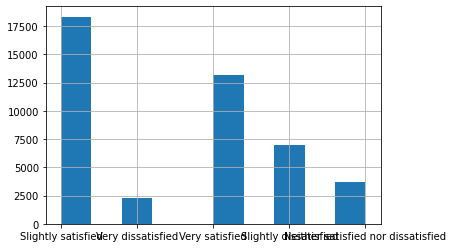

In [121]:
# distribution of Jobsatisfaction for Europe
df_all_jobsat['JobSatisfaction'][df_all_jobsat['Continent'] == 'Europe'].hist();

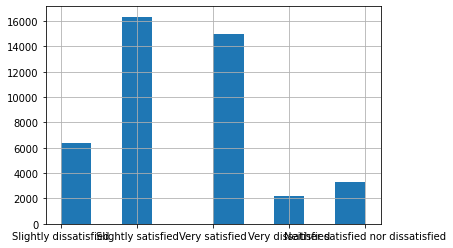

In [122]:
# distribution of Jobsatisfaction for USA
df_all_jobsat['JobSatisfaction'][df_all_jobsat['Continent'] == 'United States'].hist();

In [123]:
df_Europe = df_all_jobsat.loc[ (df_all_jobsat['Continent'] == 'Europe')]
df_USA = df_all_jobsat.loc[ (df_all_jobsat['Continent'] == 'United States')] 
mannwhitneyu(df_Europe['JobSatisfaction']  , df_USA['JobSatisfaction'])   

MannwhitneyuResult(statistic=908328128.0, pvalue=3.8457666415673024e-46)

p-value is less than 0.05 hence the groups are statistically significant differently from each-other.

- The Mann-Whitney test will be used to test if there is a difference between two categories in an ordinal variable. This process is completed by comparing the ranks of each group. Ranks are 
 determined by fist sorting all the scores in the ordinal variable, then the lowest score gets rank 1 , the next one rank 2 etc. The highest rank possible is total number of cases. If two or  more scores are the same, the average of the ranks they would have gotten is used. If for example the fourth score is a 9, the fifth is a 9 and the sixth is a 9, then the rank for score four,  five and six will each be (4+5+6)/3 = 5

------------------------------

2. Trend line from year 2018 until 2020 for both continents 

In [124]:
# Convert Categorical Data to ordinal

df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Very dissatisfied' , 'JobSatisfaction' ]  = 1
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Slightly dissatisfied' , 'JobSatisfaction' ]  = 2
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction' ]  = 3
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction' ]  = 3
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Slightly satisfied' , 'JobSatisfaction' ]  = 4
df_all_jobsat.loc[df_all_jobsat['JobSatisfaction'] == 'Very satisfied' , 'JobSatisfaction' ]  = 5


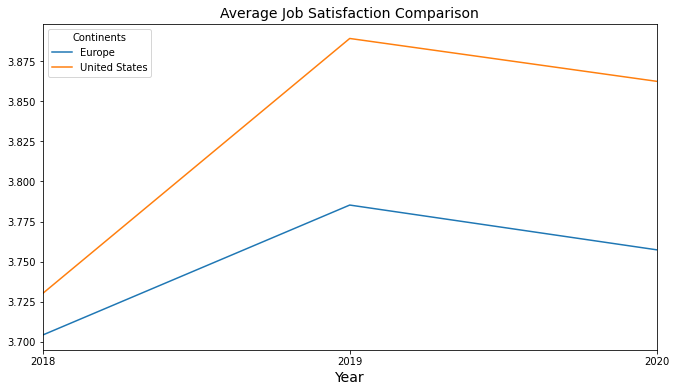

In [125]:
# Convert year from string to datetime
df_all_jobsat.Year = pd.to_datetime(df_all_jobsat.Year , format = '%Y')   

# Get the mean of based on Continent and Year
df_all_yearly_avg = df_all_jobsat.groupby(['Continent','Year']).mean()['JobSatisfaction_Ordinal']

# Create a pivot table with continents as columns and their mean values as rows
df_all_yearly_avg = df_all_yearly_avg.unstack(level='Continent')
df_all_yearly_avg.columns.name = 'Continents'

# Plot the data
ax = df_all_yearly_avg.plot(figsize=(11, 6)  );
ax.set_xlabel('Year', fontsize=14);
ax.set_title("Average Job Satisfaction Comparison" , fontsize=14);




- Which are the most important aspects listed each category ('Very dissatisfied' ,'Slightly dissatisfied' , 'Neither satisfied nor dissatisfied' ,'Slightly satisfied' , 'Very satisfied') , lists as most important when assessin for a potential job opportunity. 

In [126]:
df_all_jobsat

,Continent,JobSatisfaction,Year,JobSatisfaction_Ordinal,row_num
0,Europe,4,2020-01-01,4.0,0
1,Europe,1,2020-01-01,1.0,1
2,Europe,4,2020-01-01,4.0,2
3,United States,2,2020-01-01,2.0,3
4,Europe,5,2020-01-01,5.0,4
...,...,...,...,...,...
87584,United States,4,2018-01-01,4.0,87584
87585,United States,4,2018-01-01,4.0,87585
87586,Europe,2,2018-01-01,2.0,87586
87587,Europe,2,2018-01-01,2.0,87587


-----------------------------

- 3. For year 2020 find which are top job factors for each gender

In [127]:
# get the required fields
df_job_top_factors = df_2020[[ 'Respondent' , 'Gender' , 'JobFactors']]
df_job_top_factors = df_job_top_factors.dropna(how='any')
df_job_top_factors.shape


(46007, 3)

In [128]:
df_job_top_factors['Gender'].value_counts()

Man                                                            41866
Woman                                                           3532
Non-binary, genderqueer, or gender non-conforming                340
Man;Non-binary, genderqueer, or gender non-conforming            107
Woman;Non-binary, genderqueer, or gender non-conforming           78
Woman;Man                                                         66
Woman;Man;Non-binary, genderqueer, or gender non-conforming       18
Name: Gender, dtype: int64

- If the Gender is different from Man and Woman then rename it as Non-Binary

In [129]:
df_job_top_factors.loc[~ ((df_job_top_factors['Gender'] == 'Man') | (df_job_top_factors['Gender'] == 'Woman')) , 'Gender'] = 'Non-Binary'
df_job_top_factors['Gender'].value_counts()

Man           41866
Woman          3532
Non-Binary      609
Name: Gender, dtype: int64

In [130]:
df_factors_dummies = df_job_top_factors['JobFactors'].str.get_dummies(sep = ';')


df_dummies_final = pd.concat([df_factors_dummies, df_job_top_factors['Gender']], axis=1)

In [131]:
df_dummies_final

,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on,Gender
0,0,0,0,0,0,0,1,0,1,1,0,Man
3,0,0,0,1,0,0,0,1,1,0,0,Man
5,1,0,0,0,0,0,1,1,0,0,0,Man
7,0,1,0,0,0,0,0,0,1,1,0,Man
8,1,0,0,0,0,0,0,1,0,1,0,Man
...,...,...,...,...,...,...,...,...,...,...,...,...
63955,1,0,0,0,0,1,1,0,0,0,0,Man
64004,0,0,0,1,0,0,1,0,1,0,0,Man
64036,0,0,0,0,0,0,1,1,1,0,0,Man
64111,0,0,0,0,0,0,0,1,0,0,0,Man


In [132]:
df_dummies_grouped = df_dummies_final.groupby('Gender').sum().reset_index()
df_dummies_grouped = df_dummies_grouped.rename(columns={"Gender":"Row_Num"})


In [133]:
df_dummies_grouped_Transposed = df_dummies_grouped.T

In [134]:
new_columns = df_dummies_grouped_Transposed.iloc[0]
df_transp_grouped_dummies = df_dummies_grouped_Transposed[1:]
df_transp_grouped_dummies.columns = new_columns

In [135]:
df_transp_grouped_dummies = df_transp_grouped_dummies.reset_index()
df_transp_grouped_dummies.rename(columns = {"index":"Job_Factor" } , inplace=True)

In [136]:
df_top_man = df_transp_grouped_dummies[['Job_Factor' ,'Man']].sort_values('Man', ascending=False)
df_top_woman = df_transp_grouped_dummies[['Job_Factor' ,'Woman']].sort_values('Woman', ascending=False)
df_top_non_binary = df_transp_grouped_dummies[['Job_Factor' ,'Non-Binary']].sort_values('Non-Binary', ascending=False)


In [137]:
data_frames = [df_top_man, df_top_woman, df_top_non_binary]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Job_Factor'],  how='outer'), data_frames)

In [138]:
df_man_val = df_merged[['Job_Factor' , 'Man']]
df_woman_val = df_merged[['Job_Factor' , 'Woman']]
df_nonbinary_val = df_merged[['Job_Factor' , 'Non-Binary']]

In [139]:
df_man_val.rename(columns ={"Man":"Counts"}, inplace = True)
df_woman_val.rename(columns ={"Woman":"Counts"}, inplace = True)
df_nonbinary_val.rename(columns ={"Non-Binary":"Counts"}, inplace = True)

df_man_val['Gender'] = 'Man'
df_woman_val['Gender'] = 'Woman'
df_nonbinary_val['Gender'] = 'Non-Binary'

In [140]:
df_final = df_man_val.append([df_woman_val, df_nonbinary_val] ).reset_index()
df_final = df_final[['Job_Factor', 'Counts', 'Gender']]


In [141]:
df_final['Counts'] = pd.to_numeric(df_final['Counts'], errors='coerce')

In [163]:
df_totals = df_final.groupby([ 'Gender']).sum()['Counts'].reset_index().rename(columns = {"Counts":"Total_Count"})
df_totals = pd.merge(df_final , df_totals , how="left",on="Gender")
df_totals['Percentage'] = df_totals['Counts'] / df_totals['Total_Count'] * 100

df_totals.sort_values(["Gender","Percentage"] , ascending = False , inplace =True)

In [164]:
df_totals = df_totals.groupby("Gender").head(5)
df_totals.sort_values(["Percentage"] , ascending=False , inplace = True)
df_totals.reset_index(inplace = True)

# use wrap function to wrap the text for job factor column

df_totals['Job_Factor'] = df_totals['Job_Factor'].apply(lambda row: '\n'.join(wrap(row, 25)))

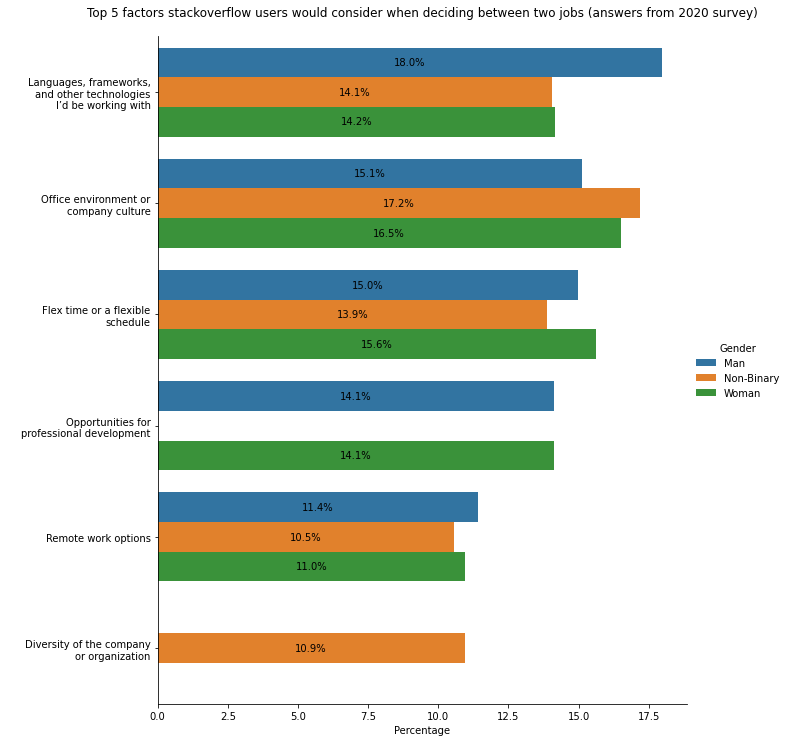

In [167]:
g  = sns.catplot(x="Percentage", y="Job_Factor", data=df_totals, hue="Gender", kind="bar",size= 10  );

g.set_yticklabels(rotation= 0);


def add_labels(graph, category_size,  omit_thresh, width_var, num_format):
        ax = graph.facet_axis(0,0)
        for p in ax.patches:
            if p.get_width() > omit_thresh: # omit labels close to zero or other threshold
                width = p.get_width() * width_var   # get bar length
                ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                num_format.format(p.get_width()), # set variable to display, 2 decimals
                ha = 'center',   # horizontal alignment
                va = 'center')  # vertical alignment
            else:
                pass


add_labels(graph=g, category_size = len(df_totals.index.unique()) ,  omit_thresh=0, width_var=0.5, num_format='{:.1f}%')


plt.ylabel(" ");
plt.title("Top 5 factors stackoverflow users would consider when deciding between two jobs (answers based on 2020 survey)" , pad = 20);